# EDA Analysis on Automobile Dataset

This notebook aims to apply Exploratory Data Analysis (EDA) to know better [Automobile Dataset](https://www.kaggle.com/datasets/toramky/automobile-dataset/) and to infer characteristics of the data which will be used into model construction and training. Since the dataset is small we choose the pandas library for it. 

THE EDA will consist of the following operations: (1) basic dataset parameters: compute number of rows and columns, how the first and last rows look like, check for missing values, see which of the variables are numeric and categorical; (2) plot some important dataset variables (3) Print out  comprehensive profiling reports (4) Conclusions.
    

#### Install/import python packages, set additional notebook rules and define useful constants:

In [14]:
#!jupyter nbextension enable --py widgetsnbextension
!pip install missingno
!pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 
import seaborn as sns
import warnings
from ydata_profiling import profile_report

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [16]:
FILE_PATHNAME1 = 'data/Automobile_data.csv'

 
PROJECT_PATHNAME = globals()['_dh'][1].resolve().parents[0]
FILE_PATHNAME = os.path.join(PROJECT_PATHNAME, FILE_PATHNAME1)

In [17]:
df =  pd.read_csv(FILE_PATHNAME)

### 1. Basic Dataset Parameters

In [18]:
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors   body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price
0          3                 ?  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47   2.68                9.0        111     5000        21           27  13495
1          3                 ?  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47   2.68                9.0        111     5000        21           27  16500
2          1                 ?  alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68   3.47                9.0        154     5000        19           26  16500
3          2               164         audi       gas        std         four        sedan          fwd           front        99.8   176.6   66.2    54.3         2337         ohc             four          109        mpfi  3.19    3.4               10.0        102     5500        24           30  13950
4          2               164         audi       gas        std         four        sedan          4wd           front        99.4   176.6   66.4    54.3         2824         ohc             five          136        mpfi  3.19    3.4                8.0        115     5500        18           22  17450

In [19]:
df.tail(5)

symboling normalized-losses   make fuel-type aspiration num-of-doors body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price
200         -1                95  volvo       gas        std         four      sedan          rwd           front       109.1   188.8   68.9    55.5         2952         ohc             four          141        mpfi  3.78   3.15                9.5        114     5400        23           28  16845
201         -1                95  volvo       gas      turbo         four      sedan          rwd           front       109.1   188.8   68.8    55.5         3049         ohc             four          141        mpfi  3.78   3.15                8.7        160     5300        19           25  19045
202         -1                95  volvo       gas        std         four      sedan          rwd           front       109.1   188.8   68.9    55.5         3012        ohcv              six          173        mpfi  3.58   2.87                8.8        134     5500        18           23  21485
203         -1                95  volvo    diesel      turbo         four      sedan          rwd           front       109.1   188.8   68.9    55.5         3217         ohc              six          145         idi  3.01    3.4               23.0        106     4800        26           27  22470
204         -1                95  volvo       gas      turbo         four      sedan          rwd           front       109.1   188.8   68.9    55.5         3062         ohc             four          141        mpfi  3.78   3.15                9.5        114     5400        19           25  22625

Here we see we have missing values denoted with sign '?' in normalized-losses column. We replace '?' with zeros.

In [20]:
df = df.replace(to_replace='?',value=0)

In [21]:
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors   body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price
0          3                 0  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47   2.68                9.0        111     5000        21           27  13495
1          3                 0  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47   2.68                9.0        111     5000        21           27  16500
2          1                 0  alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68   3.47                9.0        154     5000        19           26  16500
3          2               164         audi       gas        std         four        sedan          fwd           front        99.8   176.6   66.2    54.3         2337         ohc             four          109        mpfi  3.19    3.4               10.0        102     5500        24           30  13950
4          2               164         audi       gas        std         four        sedan          4wd           front        99.4   176.6   66.4    54.3         2824         ohc             five          136        mpfi  3.19    3.4                8.0        115     5500        18           22  17450

Count dataset zero values, value count of each attribute

In [22]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [23]:
vehicle_count=df.make.value_counts()
vehicle_count

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [24]:
print(f"Number of dataset rows: {df.shape[0]} and columns: {df.shape[1]}")

Number of dataset rows: 205 and columns: 26


Initial exploration of numerical and categorical attributes:

In [25]:
df_numerical_features = df.select_dtypes(include='number').columns.tolist()
df_categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f"Count of numerical attributes is {len(df_numerical_features)}: {df_numerical_features}")
print(f"Count of categorical attributes is {len(df_categorical_features)}: {df_categorical_features}")

Count of numerical attributes is 10: ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']
Count of categorical attributes is 16: ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


For me it looks suspicious and needs additional analysis.

# 2. Plot important data set variables.

Since we are interested in the price distribution of separate car models, we will plot:
* price distribution of each car manifacturer: average price and range price values
* normalized losses of each car manifactureres
* correlation of target car price with respect to numerical car parameters  

First convert categorical nominal data type into float and int variables.

In [28]:
df['normalized-losses'] = df['normalized-losses'].astype(int)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(int)
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['price'] = df['price'].astype(int)

Price distribution of each car manifacturer: average price and range price

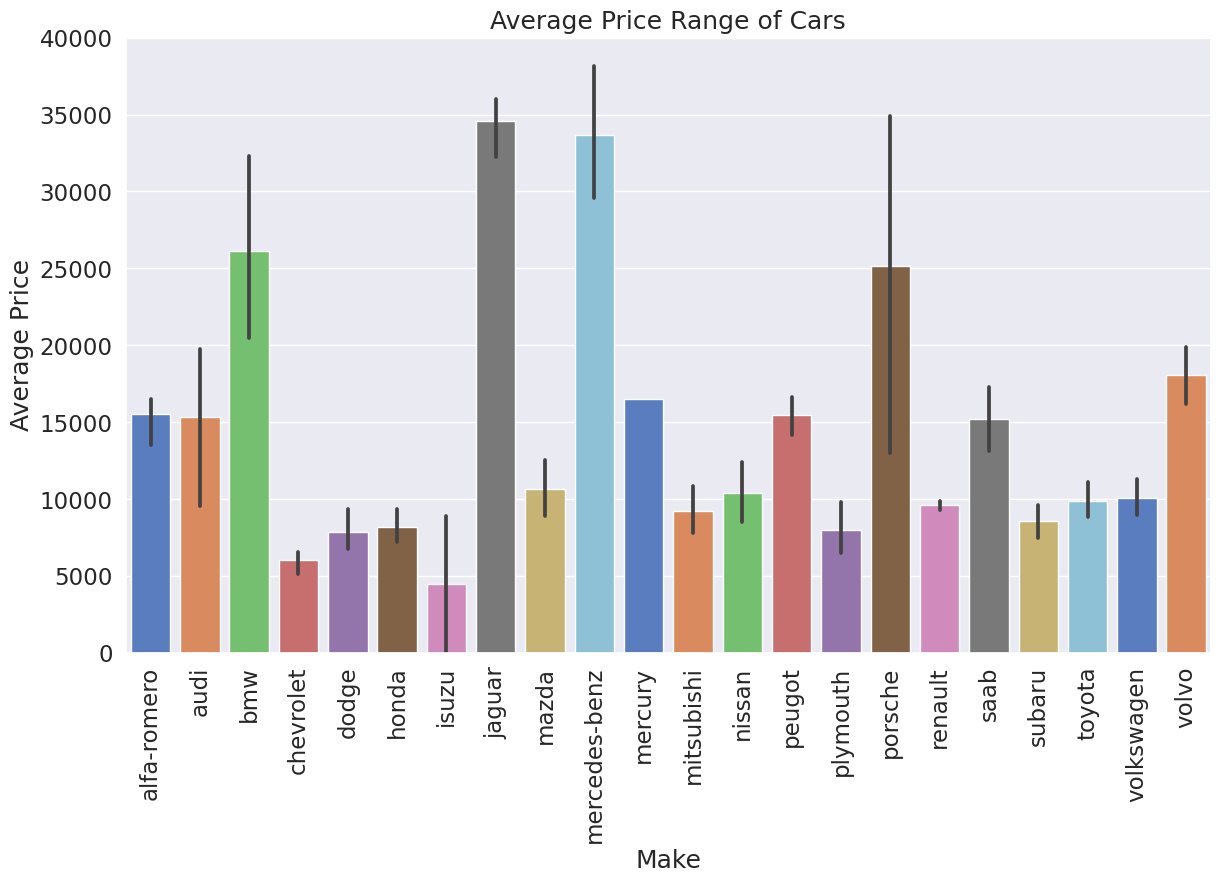

In [37]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='make', y='price', palette = 'muted')
plt.xticks(rotation=90)
price_table = sns.set(font_scale = 1.5)
plt.title('Average Price Range of Cars')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.show()

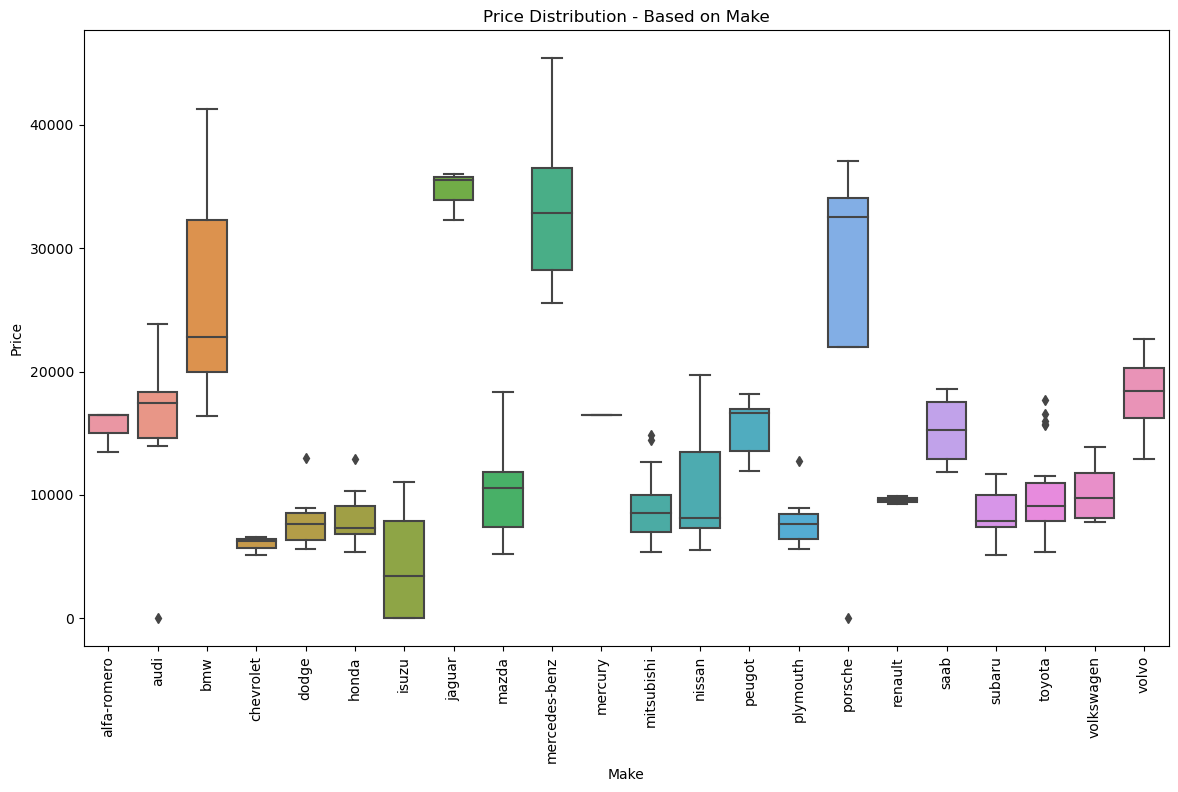

In [29]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Range of Manufacturer cars')
plt.xlabel('Car Manufacturer')
plt.ylabel('Price')
plt.show()

correlation of target car price with respect to numerical car parameters 

correlation of target car price with respect to numerical car parameters 

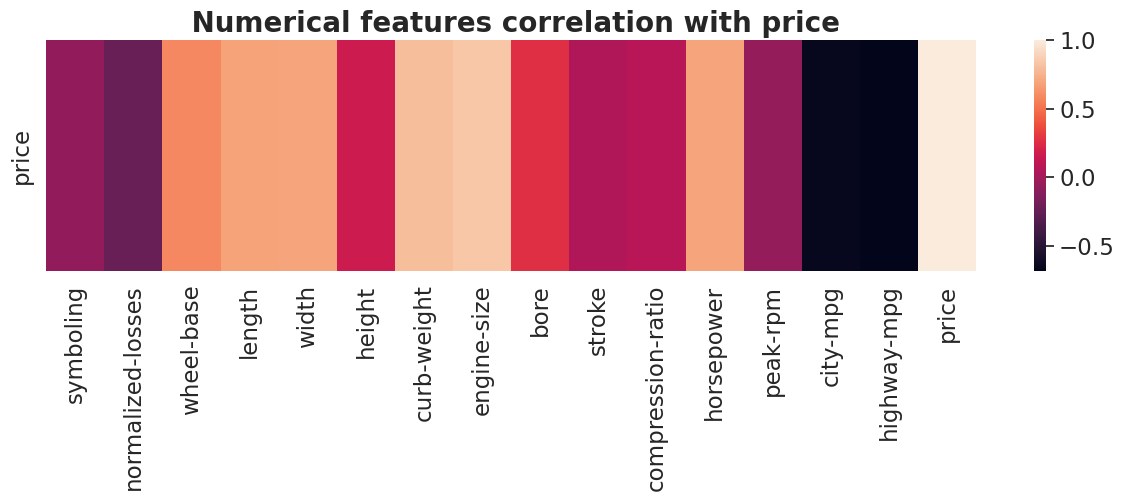

In [40]:
num = df.select_dtypes(include=np.number)
numcorr = num.corr()
f,ax = plt.subplots(figsize=(15,3))
sns.heatmap(numcorr.sort_values(by=['price'], ascending=False).head(1))
plt.title(" Numerical features correlation with price", weight='bold', fontsize=20)

plt.show()

### 4. Print out  comprehensive profiling reports

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Conclusions

    The dataset we explore is of a good quality- find no missing values, complete and reliable information about car attributes. Since most of the car attributes are highly correlated, we can apply additional processing operations to increase accuracy of the prediction model.